In [92]:
import tensorflow as tf
import tensorflow_datasets as tsdf
import os
import numpy as np
from matplotlib import pyplot as plt

In [21]:
mnist = tf.keras.datasets.mnist

In [90]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
data_iterator.next()

# Preprocessing

In [24]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Buliding the Model

In [25]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
def build_model():
  model = Sequential()

  model.add(Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1))) # Input
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(32, (5,5), activation='relu', kernel_initializer='he_uniform')) 
  model.add(MaxPooling2D(2,2))

  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax')) # Output 

  return model

In [27]:
model = build_model()

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 4, 4, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 512)              

# Training

In [29]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy

In [30]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [39]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
hist = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.3014 - accuracy: 0.9059
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1119 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0845 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0705 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0613 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0530 - accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 8/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0445 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0418 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 65s 34m

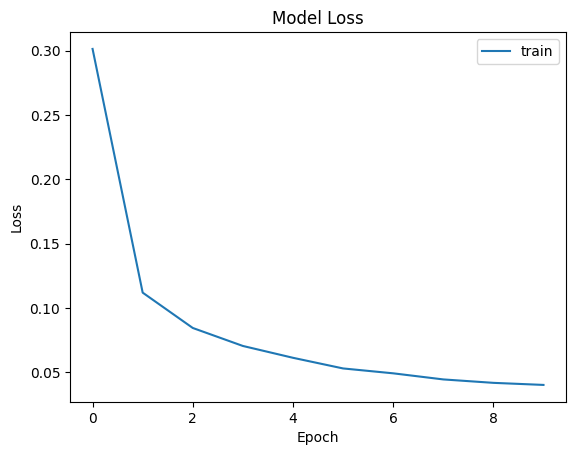

In [63]:
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [42]:
model.save('handwritten.h5')

# Predictions

In [85]:
import cv2
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [118]:
img = cv2.imread('input_image.png')[:,:,0]

In [119]:
img = np.invert(np.array([img]))
prediction = model.predict(img)

1/1 [==============================] - 0s 23ms/step


In [87]:
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

In [ ]:
for X, y in zip(x_test, y_test):
    yhat = model.predict(np.expand_dims(X, axis=0))
    y_one_hot = tf.one_hot(y, depth=10)
    y_one_hot = np.expand_dims(y_one_hot, axis=0)
    precision.update_state(y_one_hot, yhat)
    recall.update_state(y_one_hot, yhat)
    accuracy.update_state(y_one_hot, yhat)

In [115]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:0.9922853708267212, Recall:0.9904000163078308, Accuracy:0.991100013256073


In [120]:
print(f'I predict that this image is a {np.argmax(prediction)}')

I predict that this image is a 9
